# Foundation Pre-Processing
Refine the NIH pre-processed data to include only selected conditions and show data

In [3]:
import pandas

input_file = '../../../Data/BRAX_Data/output_spreadsheet1.csv'
output_file = 'BRAX1.csv'

df = pandas.read_csv(input_file)

conditions_refined = ['Atelectasis', 'Cardiomegaly', 'Lung Lesion', 'Consolidation', 'No Finding']

filtered_df = df[df[conditions_refined].eq(1).any(axis=1)]
filtered_df.to_csv(output_file, index=False)

print(f"New CSV file created with {len(filtered_df)} entries.")


New CSV file created with 13487 entries.


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /opt/conda/lib/python3.11/site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /opt/conda/lib/python3.11/site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in /opt/conda/lib/python3.11/site-packages (from seaborn) (2.2.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /opt/conda/lib/python3.11/site-packages (from seaborn) (3.9.3)

Requirement already satisfied: contourpy>=1.0.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.3.1)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.55.3)

Requirement already satisfied: kiwisolver>=1.3.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.7)

Requirement already satisfied: packaging>=20.0 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.2)

Requirement already satisfied: pillow>=8 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in /opt/conda/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2023.3)

Requirement already satisfied: tzdata>=2022.7 in /opt/conda/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2024.2)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.11/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.17.0)

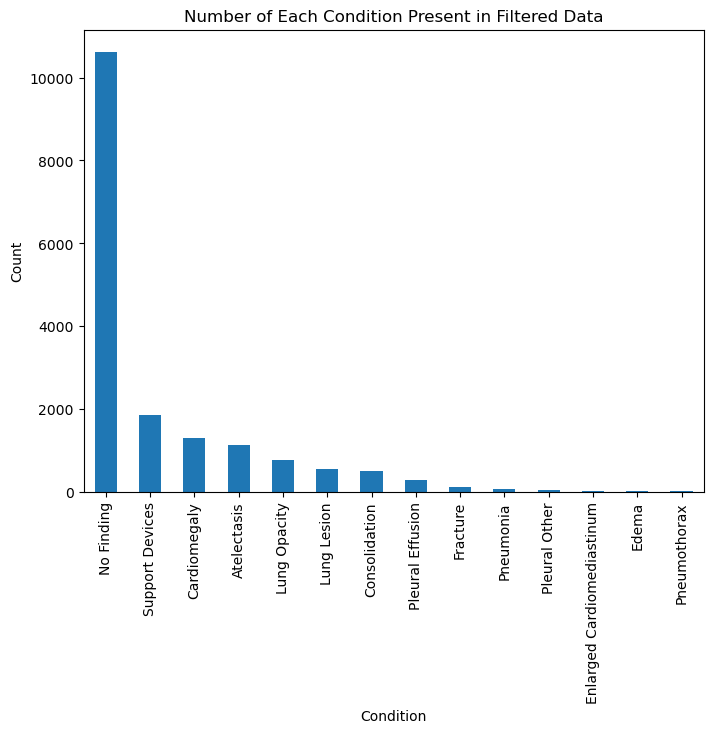

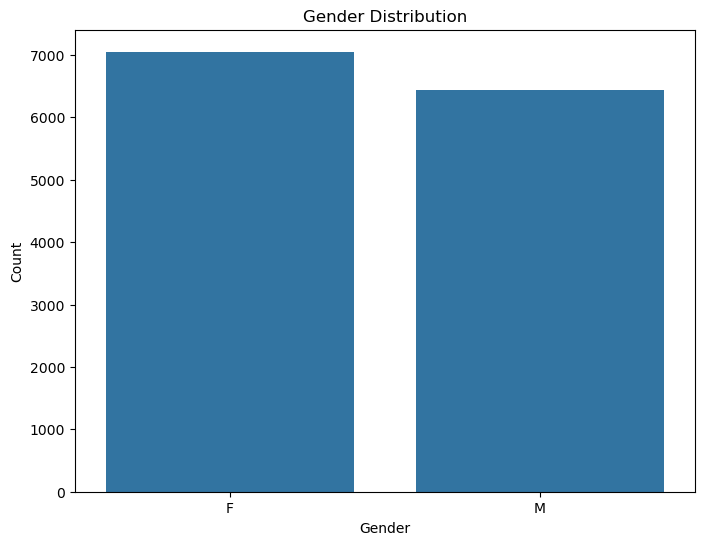

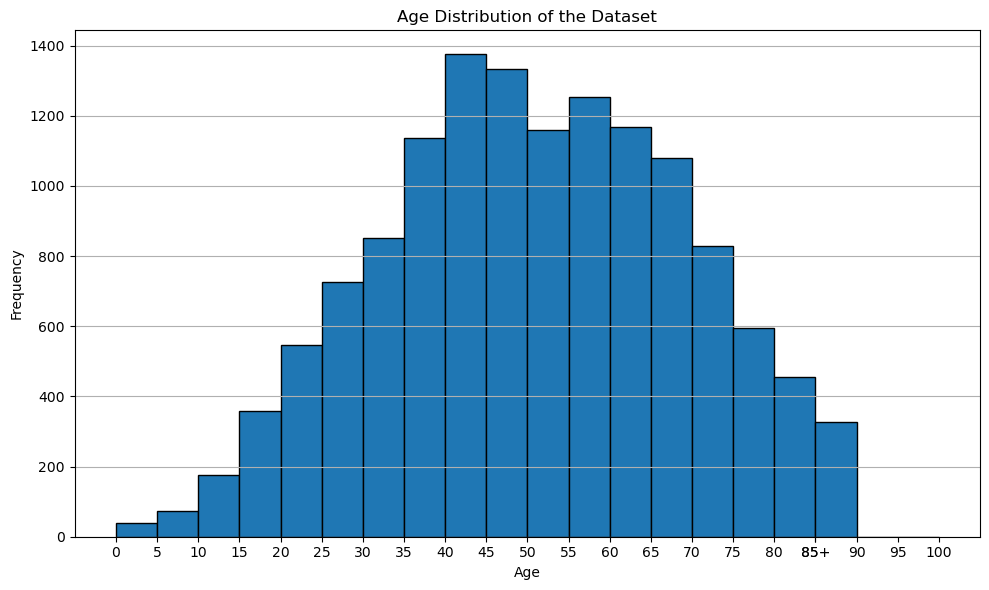

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pip
pip.main(['install','seaborn'])
import seaborn as sns

input_file = 'BRAX1.csv'
df = pd.read_csv(input_file)

conditions = [
    'Atelectasis', 'Cardiomegaly', 'Enlarged Cardiomediastinum', 'Lung Lesion', 'Lung Opacity', 'Edema',
    'Pneumonia', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices', 'No Finding', 'Consolidation'
]

condition_counts = df[conditions].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
condition_counts.plot(kind='bar')
plt.title('Number of Each Condition Present in Filtered Data')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='PatientSex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Need this beacause of the way dataset records age
df['PatientAge'] = df['PatientAge'].replace('85 or more', 85)
df['PatientAge'] = pd.to_numeric(df['PatientAge'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['PatientAge'].dropna(), bins=range(0, 101, 5), edgecolor='black')
plt.title('Age Distribution of the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(list(range(0, 101, 5)) + [85], labels=list(range(0, 101, 5)) + ['85+'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df['PatientAge'] = df['PatientAge'].replace(85, '85 or more')

Modify such as the number of no finding images is substantially decreased


In [10]:
import pandas as pd

input_file = 'BRAX1.csv'
df = pd.read_csv(input_file)

no_finding_df = df[df['No Finding'] == 1]
no_finding_sampled_df = no_finding_df.sample(n=2000, random_state=42)
other_conditions_df = df[df['No Finding'] == 0]
final_df = pd.concat([no_finding_sampled_df, other_conditions_df])

output_file = 'BRAX2.csv'
final_df.to_csv(output_file, index=False)

print(f"New CSV file created with {len(final_df)} entries.")

New CSV file created with 4856 entries.


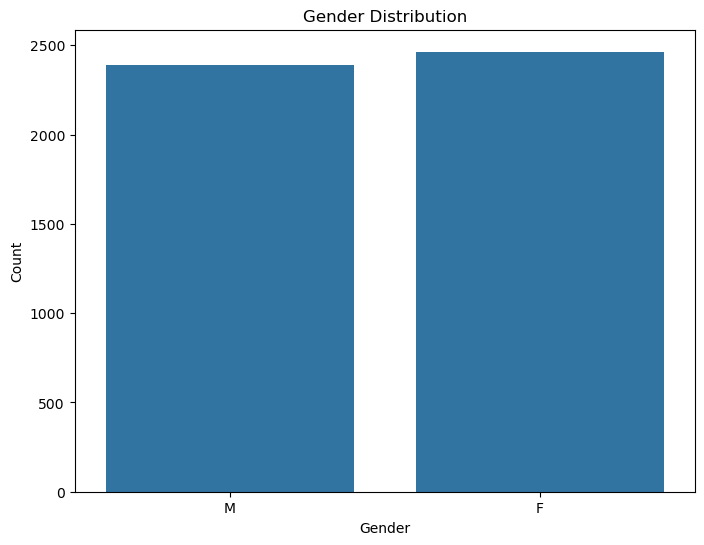

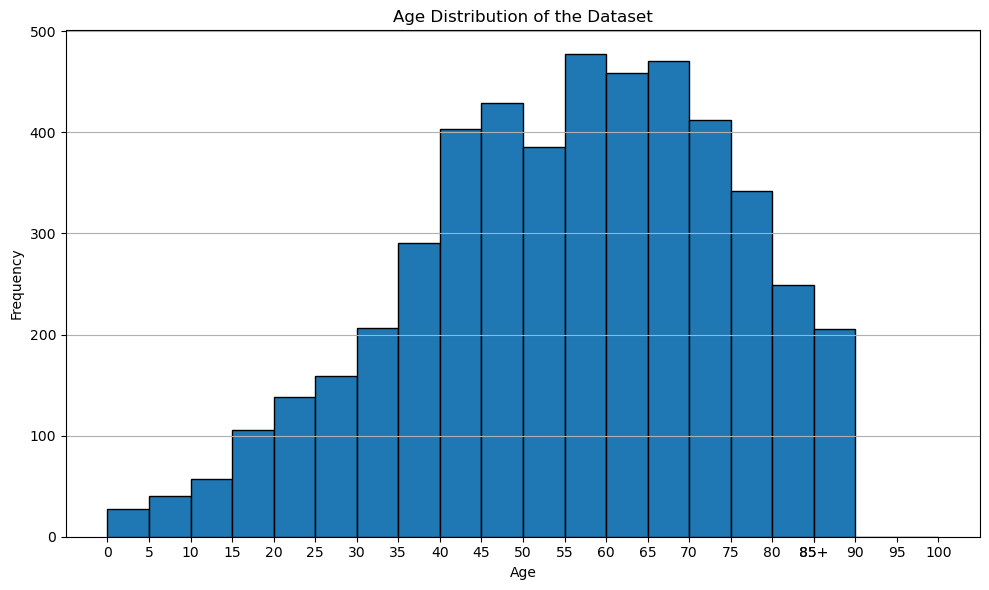

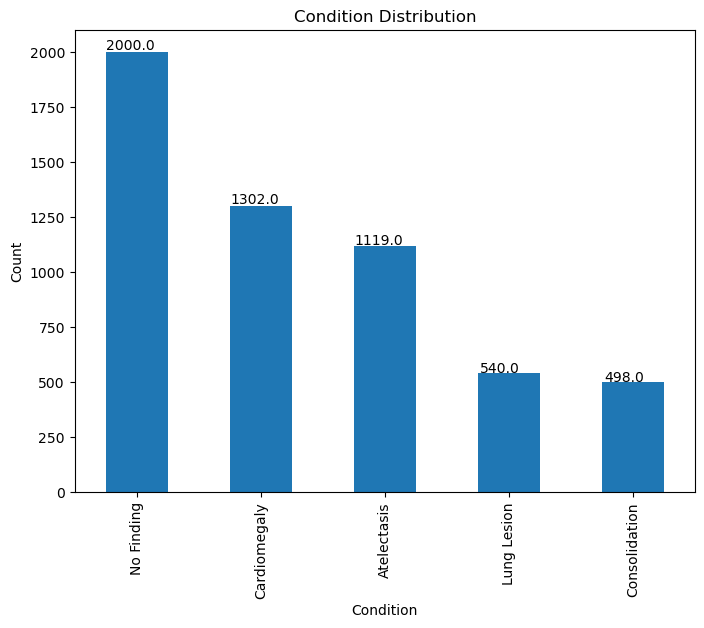

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

input_file = 'BRAX2.csv'
df = pd.read_csv(input_file)

plt.figure(figsize=(8, 6))
sns.countplot(x='PatientSex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#Need this beacause of the way dataset records age
df['PatientAge'] = df['PatientAge'].replace('85 or more', 85)
df['PatientAge'] = pd.to_numeric(df['PatientAge'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['PatientAge'].dropna(), bins=range(0, 101, 5), edgecolor='black')
plt.title('Age Distribution of the Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(list(range(0, 101, 5)) + [85], labels=list(range(0, 101, 5)) + ['85+'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df['PatientAge'] = df['PatientAge'].replace(85, '85 or more')

conditions = ['Atelectasis', 'Cardiomegaly', 'Lung Lesion', 'Consolidation', 'No Finding']
condition_counts = df[conditions].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
axis = condition_counts.plot(kind='bar')
plt.title('Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Count')
for p in axis.patches:
    axis.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

Load data into arrays

In [1]:
import os
import pandas as pd
import numpy as np

def process_and_save_images(csv_path, output_image_names_path, output_labels_path, file_extension='.png'):
    df = pd.read_csv(csv_path)
    conditions = ['Atelectasis', 'Cardiomegaly', 'Lung Lesion', 'Consolidation', 'No Finding']

    image_names = []
    labels_list = []

    for index, row in df.iterrows():
        image_path = row['PngPath']
        image_name = os.path.basename(image_path)
        if not image_name.endswith(file_extension):
            image_name += file_extension

        labels = [1 if row.get(condition, 0) == 1 else 0 for condition in conditions]
        image_names.append(image_name)
        labels_list.append(labels)

    np.save(output_image_names_path, image_names, allow_pickle=True)
    np.save(output_labels_path, labels_list, allow_pickle=True)
    print('Arrays made')

csv_path = 'BRAX2.csv'
output_image_names_path = 'image_names.npy'
output_labels_path = 'labels.npy'
process_and_save_images(csv_path, output_image_names_path, output_labels_path)

Arrays made


Image: image-77262364-25503489-28332662-61918093-08652710.png
Labels: [0 0 0 0 1]


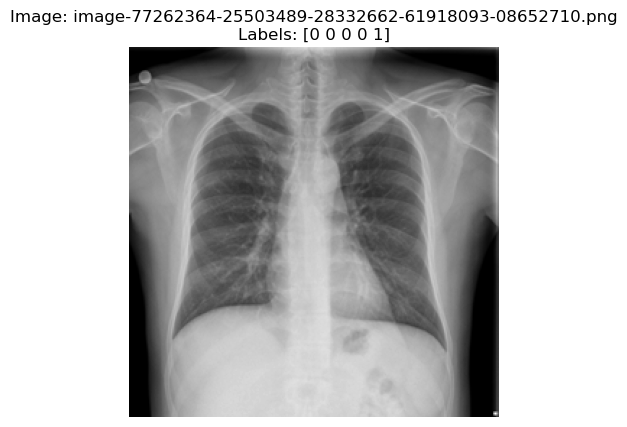

Image: image-53406723-88648735-74787950-82587171-43375664.png
Labels: [0 0 0 0 1]


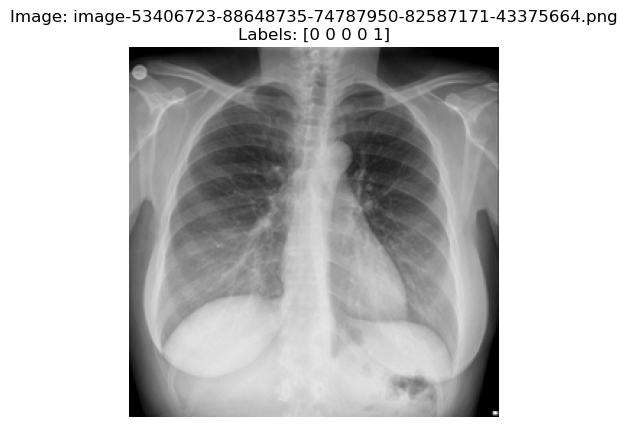

Image: image-67306353-17803034-80729243-02364293-89052498.png
Labels: [0 0 0 0 1]


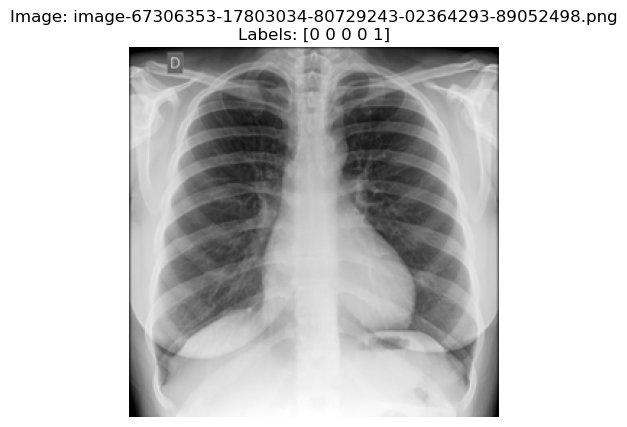

Image: image-18560092-28655129-98658349-55871330-86544252.png
Labels: [0 1 0 0 0]


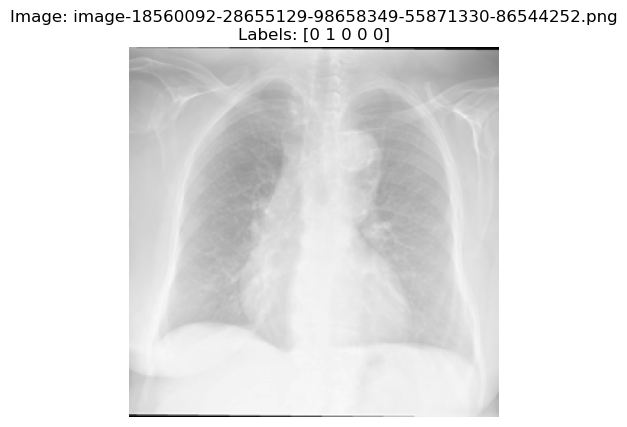

Image: image-40987701-00185149-73447383-13931572-83787961.png
Labels: [0 0 0 0 1]


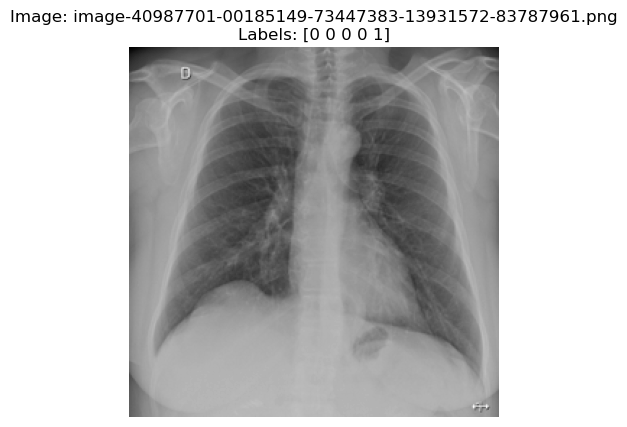

In [2]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_random_entries(image_names_path, labels_path, image_path, num_entries=5):
    image_names = np.load(image_names_path, allow_pickle=True)
    labels_list = np.load(labels_path, allow_pickle=True)

    random_indices = random.sample(range(len(image_names)), num_entries)

    for index in random_indices:
        filename = image_names[index]
        labels = labels_list[index]
        file_path = os.path.join(image_path, filename)

        print(f"Image: {filename}\nLabels: {labels}")

        if os.path.exists(file_path):
            image = Image.open(file_path)
            plt.imshow(image, cmap='gray')
            plt.title(f"Image: {filename}\nLabels: {labels}")
            plt.axis('off')
            plt.show()
        else:
            print(f"File not found: {file_path}")

image_names_path = 'image_names.npy'
labels_path = 'labels.npy'
image_path = '../../../Data/BRAX_Images/'
display_random_entries(image_names_path, labels_path, image_path, num_entries=5)
#Condition order is Atelectasis, Cardiomegaly, Mass_Nodule, Consolidation, No Finding

In [1]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# def split_data(image_names_path, labels_path, train_ratio=0.75, test_ratio=0.10, val_ratio=0.15):
#     image_names = np.load(image_names_path)
#     labels_list = np.load(labels_path)

#     train_image_names, temp_image_names, train_labels, temp_labels = train_test_split(
#         image_names, labels_list, train_size=train_ratio, random_state=7, shuffle=True
#     )

#     val_ratio_temp = val_ratio / (test_ratio + val_ratio)

#     val_image_names, test_image_names, val_labels, test_labels = train_test_split(
#         temp_image_names, temp_labels, train_size=val_ratio_temp, random_state=4, shuffle=True
#     )

#     np.save('../Data/Arrays/train_image_names.npy', train_image_names, allow_pickle=True)
#     np.save('../Data/Arrays/train_labels.npy', train_labels, allow_pickle=True)
#     np.save('../Data/Arrays/val_image_names.npy', val_image_names, allow_pickle=True)
#     np.save('../Data/Arrays/val_labels.npy', val_labels, allow_pickle=True)
#     np.save('../Data/Arrays/test_image_names.npy', test_image_names, allow_pickle=True)
#     np.save('../Data/Arrays/test_labels.npy', test_labels, allow_pickle=True)

#     print('Data split into train, validation, and test sets.')

# image_names_path = '../Data/Arrays/image_names.npy'
# labels_path = '../Data/Arrays/labels.npy'
# split_data(image_names_path, labels_path)

Data split into train, validation, and test sets.


Data split for training, validation, and testing

Display the number of conditions, age distribution

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in /opt/conda/lib/python3.11/site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in /opt/conda/lib/python3.11/site-packages (from seaborn) (1.26.4)

Requirement already satisfied: pandas>=1.2 in /opt/conda/lib/python3.11/site-packages (from seaborn) (2.2.3)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in /opt/conda/lib/python3.11/site-packages (from seaborn) (3.9.3)

Requirement already satisfied: contourpy>=1.0.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.3.1)

Requirement already satisfied: cycler>=0.10 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.55.3)

Requirement already satisfied: kiwisolver>=1.3.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.7)

Requirement already satisfied: packaging>=20.0 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.2)

Requirement already satisfied: pillow>=8 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.2.0)

Requirement already satisfied: python-dateutil>=2.7 in /opt/conda/lib/python3.11/site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in /opt/conda/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2023.3)

Requirement already satisfied: tzdata>=2022.7 in /opt/conda/lib/python3.11/site-packages (from pandas>=1.2->seaborn) (2024.2)

Requirement already satisfied: six>=1.5 in /opt/conda/lib/python3.11/site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.17.0)

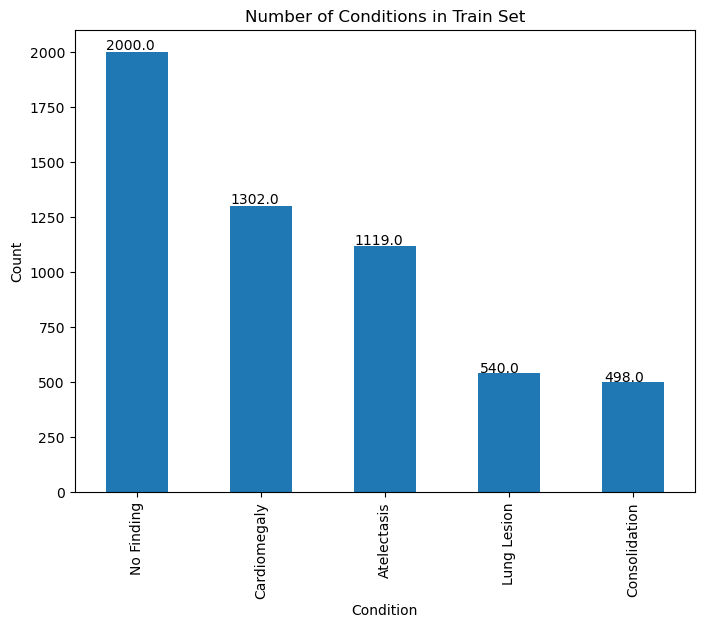

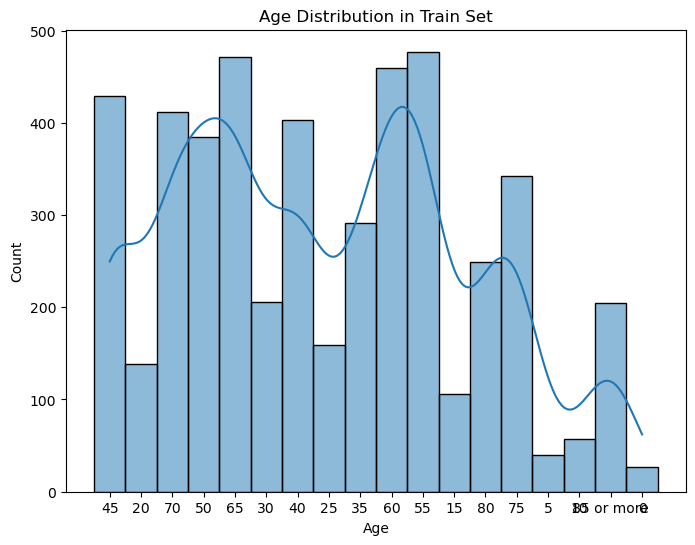

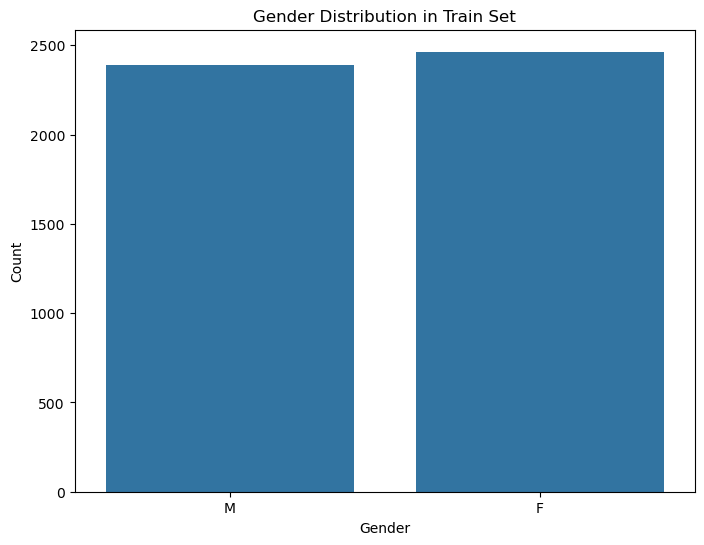

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pip
pip.main(['install','seaborn'])
import seaborn as sns

csv_path = 'BRAX2.csv'
df = pd.read_csv(csv_path)

def create_dataframe(image_names, df):
    df['BaseName'] = df['PngPath'].apply(os.path.basename)
    filtered_df = df[df['BaseName'].isin(image_names)]
    return filtered_df.drop(columns=['BaseName'])
    

train_image_names = np.load('image_names.npy')
# val_image_names = np.load('../Data/Arrays/val_image_names.npy')
# test_image_names = np.load('../Data/Arrays/test_image_names.npy')

train_df = create_dataframe(train_image_names, df)
# val_df = create_dataframe(val_image_names, df)
# test_df = create_dataframe(test_image_names, df)

def plot_conditions(df, title):
    conditions = ['Atelectasis', 'Cardiomegaly', 'Lung Lesion', 'Consolidation', 'No Finding']
    condition_counts = df[conditions].sum().sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    axis = condition_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Condition')
    plt.ylabel('Count')
    for p in axis.patches:
        axis.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.show()

def plot_age_distribution(df, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(df['PatientAge'], bins=range(0, 100, 5), kde=True)
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.show()

def plot_gender_distribution(df, title):
    plt.figure(figsize=(8, 6))
    axis = sns.countplot(x='PatientSex', data=df)
    plt.title(title)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

plot_conditions(train_df, 'Number of Conditions in Train Set')
# plot_conditions(val_df, 'Number of Conditions in Validation Set')
# plot_conditions(test_df, 'Number of Conditions in Test Set')

plot_age_distribution(train_df, 'Age Distribution in Train Set')
# plot_age_distribution(val_df, 'Age Distribution in Validation Set')
# plot_age_distribution(test_df, 'Age Distribution in Test Set')

plot_gender_distribution(train_df, 'Gender Distribution in Train Set')
# plot_gender_distribution(val_df, 'Gender Distribution in Validation Set')
# plot_gender_distribution(test_df, 'Gender Distribution in Test Set')

Create image arrays

In [4]:
import numpy as np
from PIL import Image
import os

def load_and_preprocess_images(image_names, image_dir):
    images = []
    for image_name in image_names:
        image_path = os.path.join(image_dir, image_name)
        try:
            with Image.open(image_path) as img:
                img = np.array(img).astype('float32') / 255.0 
                images.append(img)
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
    return np.array(images)

image_names = np.load('image_names.npy')

image_dir = '../../../Data/BRAX_Images/'

images = load_and_preprocess_images(image_names, image_dir)

np.save('images.npy', images)


print('Images loaded, preprocessed, and saved.')

Images loaded, preprocessed, and saved.


Verify the data splits and labels

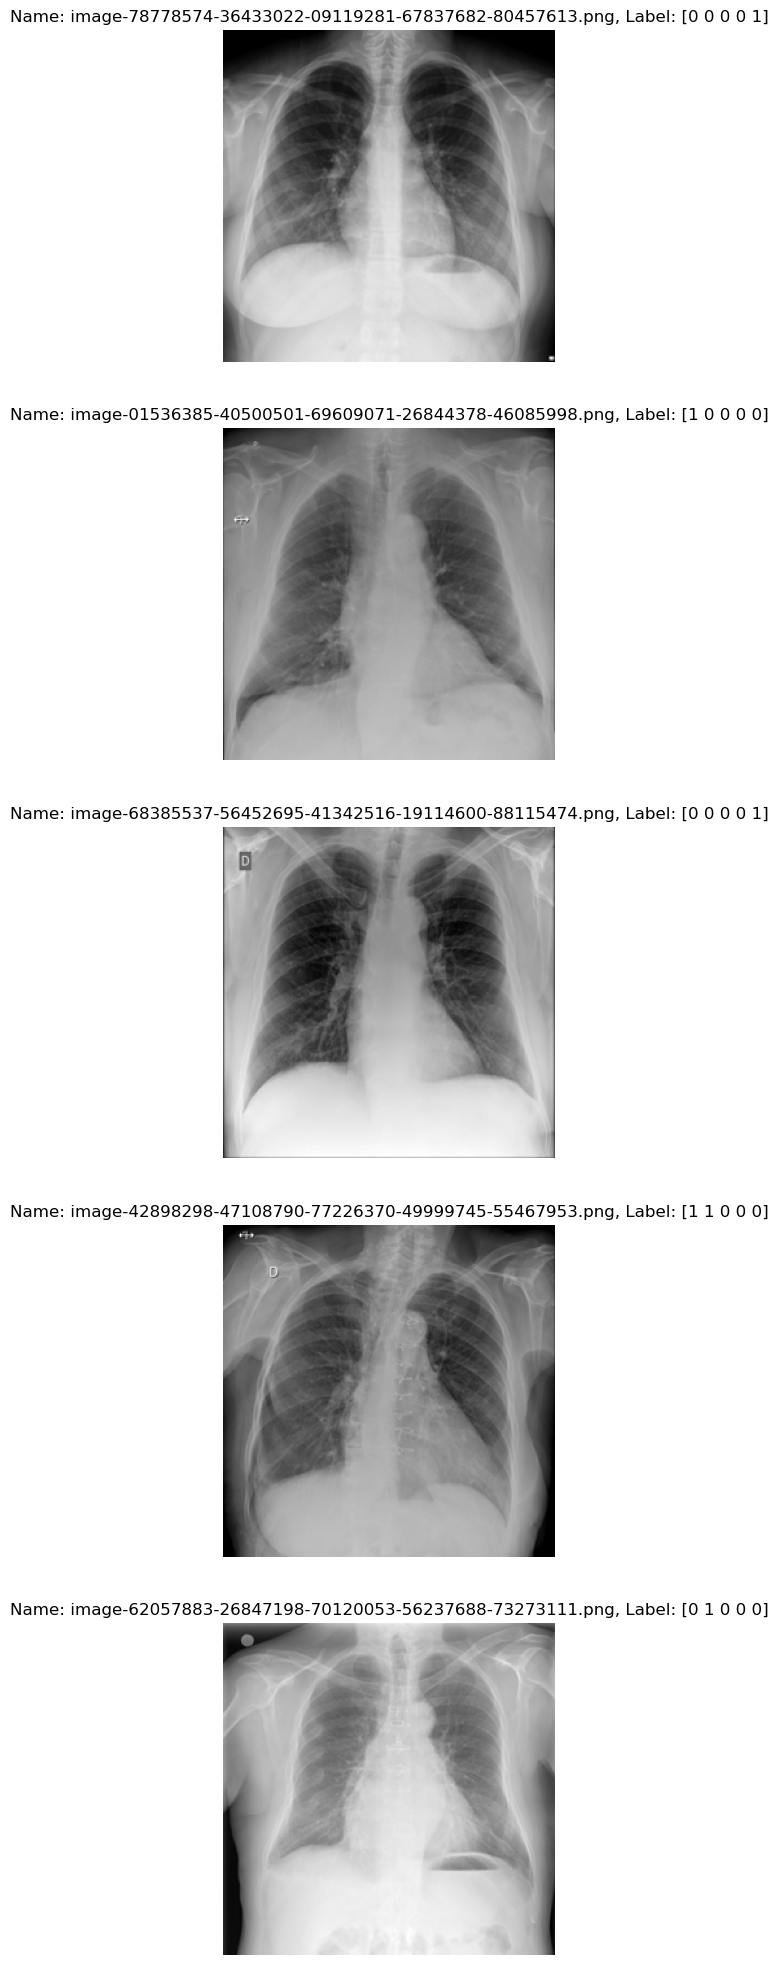

Name: image-78778574-36433022-09119281-67837682-80457613.png, Label: [0 0 0 0 1]
Name: image-01536385-40500501-69609071-26844378-46085998.png, Label: [1 0 0 0 0]
Name: image-68385537-56452695-41342516-19114600-88115474.png, Label: [0 0 0 0 1]
Name: image-42898298-47108790-77226370-49999745-55467953.png, Label: [1 1 0 0 0]
Name: image-62057883-26847198-70120053-56237688-73273111.png, Label: [0 1 0 0 0]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

def display_random_images(image_array_path, image_names_path, labels_path, x):
    images = np.load(image_array_path, allow_pickle=True)
    image_names = np.load(image_names_path, allow_pickle=True)
    labels = np.load(labels_path, allow_pickle=True)

    random_indices = random.sample(range(len(images)), x)

    plt.figure(figsize=(15, 5 * x))
    for i, idx in enumerate(random_indices):
        plt.subplot(x, 1, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Name: {image_names[idx]}, Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

    for idx in random_indices:
        print(f"Name: {image_names[idx]}, Label: {labels[idx]}")

display_random_images('images.npy', 'image_names.npy', 'labels.npy', 5)

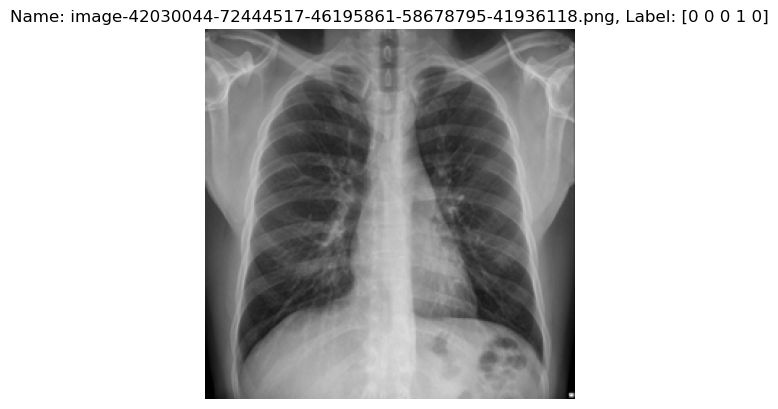

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def display_image_and_label(image_name, image_dir, labels_path, image_names_path):
    labels = np.load(labels_path, allow_pickle=True)
    image_names = np.load(image_names_path, allow_pickle=True)

    try:
        index = np.where(image_names == image_name)[0][0]
    except IndexError:
        print(f"Image name {image_name} not found in the image names array.")
        return

    image_path = os.path.join(image_dir, image_name)

    try:
        with Image.open(image_path) as img:
            plt.imshow(img, cmap='gray')
            plt.title(f"Name: {image_name}, Label: {labels[index]}")
            plt.axis('off')
            plt.show()
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

image_name = 'image-42030044-72444517-46195861-58678795-41936118.png'
image_dir = '../../../Data/BRAX_Images/'
labels_path = 'labels.npy'
image_names_path = 'image_names.npy'

display_image_and_label(image_name, image_dir, labels_path, image_names_path)